In [1]:
#Launch commands to automatically reload modules
%load_ext autoreload
%autoreload 2

In [2]:
#Load libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset into a dataframe
data = pd.read_csv('../data/processed/final_dataset.csv')

In [4]:
data.shape

(25456, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25456 entries, 0 to 25455
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         25456 non-null  object 
 1   Total Cases                     25456 non-null  int64  
 2   New Cases                       25456 non-null  float64
 3   Total Deaths                    25456 non-null  float64
 4   New Deaths                      25456 non-null  float64
 5   Total Recovered                 25456 non-null  float64
 6   New Recovered                   25456 non-null  float64
 7   Active Cases                    25456 non-null  float64
 8   Serious, Critical               25456 non-null  float64
 9   Tot Cases/1M pop                25456 non-null  float64
 10  Deaths/1M pop                   25456 non-null  float64
 11  Total Tests                     25456 non-null  float64
 12  Tests/1M pop                    

In [6]:
data.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,...,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
1,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
2,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
3,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
4,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58


In [7]:
# Convert date column to date format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [9]:
# Selecting specific columns from the current DataFrame
Q1 = data.loc[:, ['Region', 'Country','Population','Total Cases','New Cases','Active Cases', 'Tot Cases/1M pop', 'Deaths/1M pop','Total Tests', 'Tests/1M pop', 'total_vaccinations', 'Year','date']]

# Displaying the first few rows of Q1
print(Q1)

                           Region Country  Population  Total Cases  New Cases   
0           Europe & Central Asia  France  65584518.0     40138560      611.5  \
1           Europe & Central Asia  France  65584518.0     40138560      611.5   
2           Europe & Central Asia  France  65584518.0     40138560      611.5   
3           Europe & Central Asia  France  65584518.0     40138560      611.5   
4           Europe & Central Asia  France  65584518.0     40138560      611.5   
...                           ...     ...         ...          ...        ...   
25451  Middle East & North Africa   Malta    444033.0       121392      611.5   
25452  Middle East & North Africa   Malta    444033.0       121392      611.5   
25453  Middle East & North Africa   Malta    444033.0       121392      611.5   
25454  Middle East & North Africa   Malta    444033.0       121392      611.5   
25455  Middle East & North Africa   Malta    444033.0       121392      611.5   

       Active Cases  Tot Ca

In [10]:
#Group data by country
group_data = Q1.groupby('Country').agg({
    'Population': 'max',               # Max population per country
    'Total Cases': 'sum',              # Sum of total cases per country
    'New Cases': 'sum',                # Sum of new cases per country
    'Active Cases': 'max',             # Max active cases per country
    'Tot Cases/1M pop': 'mean',        # Mean total cases per 1M population per country
    'Deaths/1M pop': 'mean',           # Mean deaths per 1M population per country
    'Total Tests': 'sum',              # Sum of total tests per country
    'Tests/1M pop': 'mean',            # Mean tests per 1M population per country
    'total_vaccinations': 'max',       # Max total vaccinations per country
    'Year': 'max',                     # Max year per country
    'date': 'max'                      # Max date per country
}).reset_index()

In [11]:
group_data

,Country,Population,Total Cases,New Cases,Active Cases,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,total_vaccinations,Year,date
0,Argentina,46010234.0,26538816447,1607633.5,0.000000,219400.0,2841.0,9.389755e+10,776264.0,28322602,2019,2022-03-29
1,Austria,9066710.0,1946011840,195680.0,3811.000000,670727.0,2486.0,6.760753e+10,23302116.0,14584985,2019,2022-03-25
2,Belgium,11668278.0,1554716160,195680.0,3866.000000,416384.0,2946.0,1.198534e+10,3209915.0,17451842,2019,2022-03-25
3,Bulgaria,6844597.0,314740435,4935.0,7997.000000,195676.0,5660.0,2.731510e+09,1698193.0,2852218,2019,2022-03-18
4,Chile,19250195.0,7996960379,912969.5,39356.000000,278247.0,3350.0,7.522047e+10,2617225.0,25596927,2019,2022-03-22
5,Croatia,4059286.0,327432000,152875.0,32609.000000,322650.0,4604.0,1.415021e+09,1394355.0,3921503,2019,2022-03-25
6,Cyprus,1223387.0,156655300,140645.0,0.000000,556741.0,1116.0,2.217227e+09,7879860.0,1188656,2019,2022-03-18
7,Denmark,5834950.0,808674024,155321.0,0.000000,545636.0,1511.0,3.285061e+10,22165247.0,10259219,2019,2022-03-25
8,Ecuador,18113361.0,1367700264,781497.0,0.000000,59083.0,1990.0,3.939311e+09,170173.0,15812935,2019,2022-01-28
9,Estonia,1321910.0,148775091,144925.5,264824.507853,474876.0,2270.0,1.644677e+09,5249652.0,1488804,2019,2022-03-18


In [12]:
# Calculate percentage columns
group_data['Total Cases %'] = group_data['Total Cases'] / group_data['Population'] * 100
group_data['New Cases %'] = group_data['New Cases'] / group_data['Population'] * 100
group_data['Active Cases %'] = group_data['Active Cases'] / group_data['Population'] * 100
group_data['Total Vaccinations %'] = group_data['total_vaccinations'] / group_data['Population'] * 100
group_data['Total Tests %'] = group_data['Total Tests'] / group_data['Population'] * 100

In [13]:
group_data.columns

Index(['Country', 'Population', 'Total Cases', 'New Cases', 'Active Cases',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
       'total_vaccinations', 'Year', 'date', 'Total Cases %', 'New Cases %',
       'Active Cases %', 'Total Vaccinations %', 'Total Tests %'],
      dtype='object')

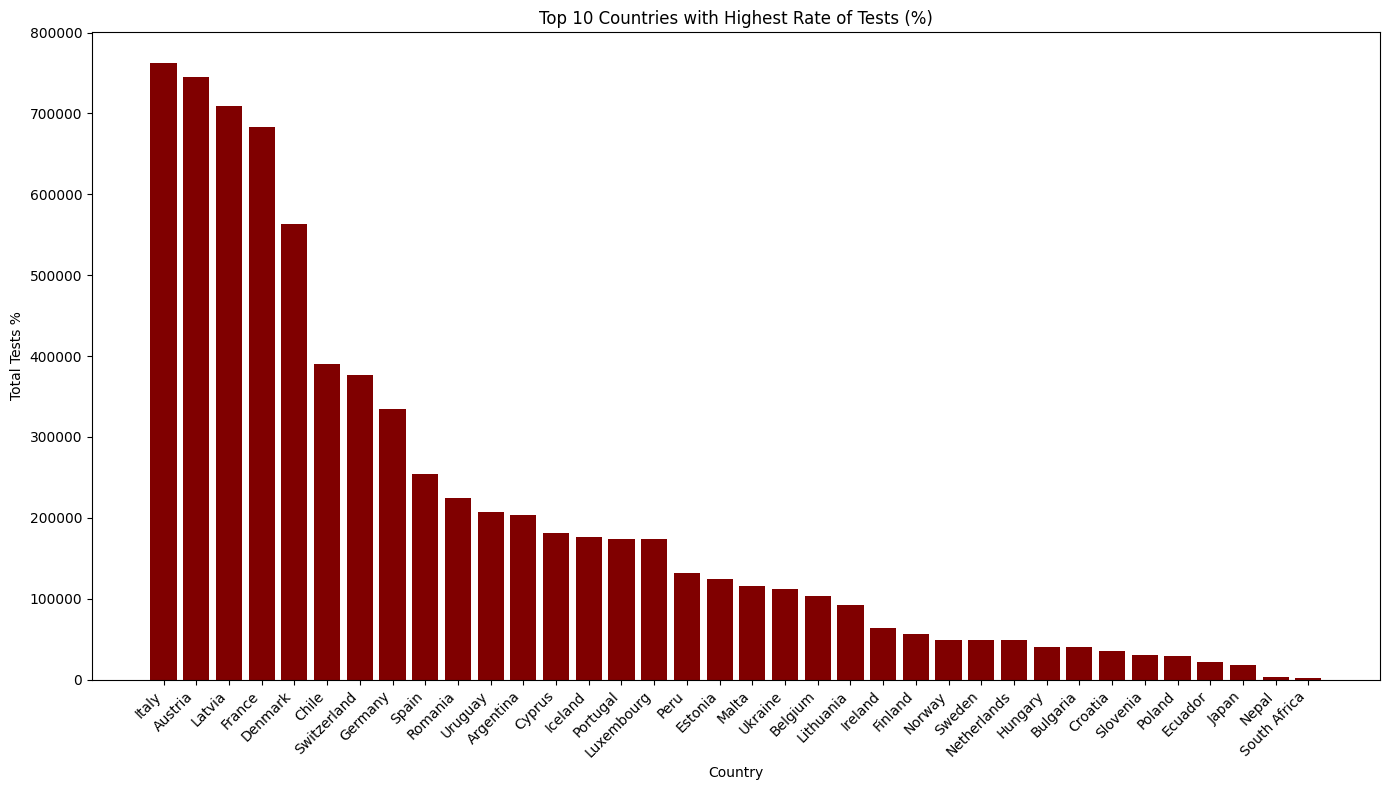

In [14]:
group_data_sorted = group_data.sort_values(by='Total Tests %', ascending=False)

# Plot the data
plt.figure(figsize=(14, 8))
plt.bar(group_data_sorted['Country'], group_data_sorted['Total Tests %'], color='maroon')
plt.xlabel('Country')
plt.ylabel('Total Tests %')
plt.title('Top 10 Countries with Highest Rate of Tests (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

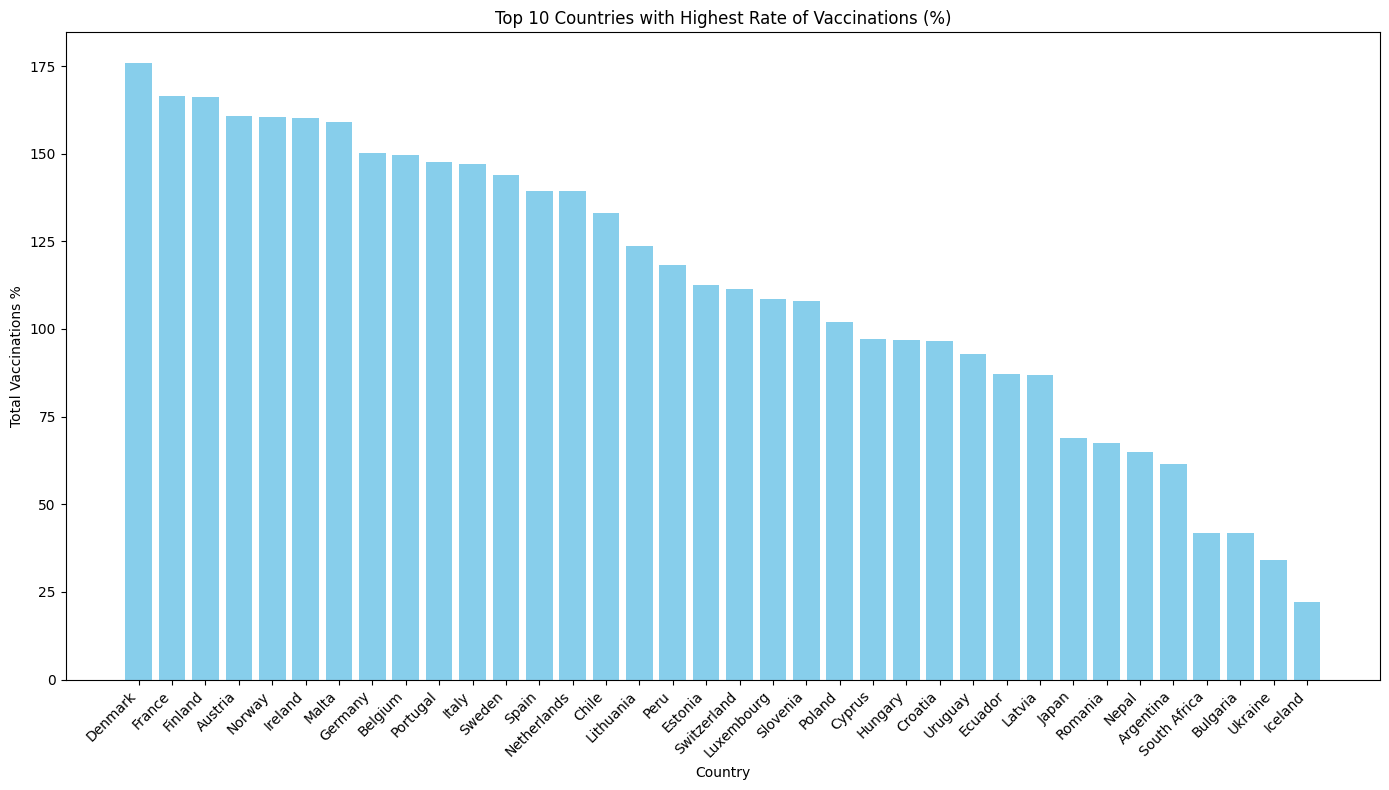

In [15]:
group_data_sorted = group_data.sort_values(by='Total Vaccinations %', ascending=False)

# Plot the data
plt.figure(figsize=(14, 8))
plt.bar(group_data_sorted['Country'], group_data_sorted['Total Vaccinations %'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Vaccinations %')
plt.title('Top 10 Countries with Highest Rate of Vaccinations (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

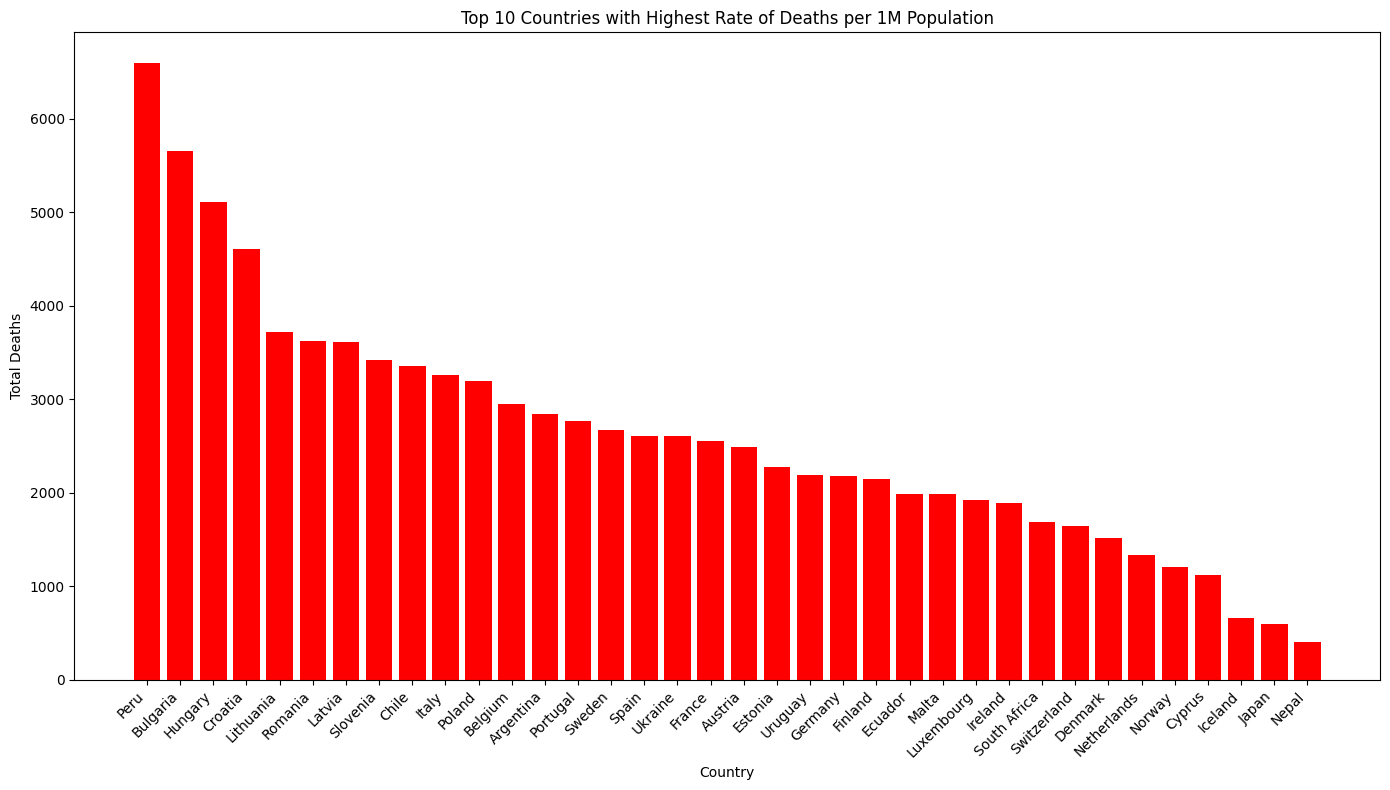

In [16]:
group_data_sorted = group_data.sort_values(by= 'Deaths/1M pop', ascending=False)

# Plot the data
plt.figure(figsize=(14, 8))
plt.bar(group_data_sorted['Country'], group_data_sorted['Deaths/1M pop'], color='red')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Top 10 Countries with Highest Rate of Deaths per 1M Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

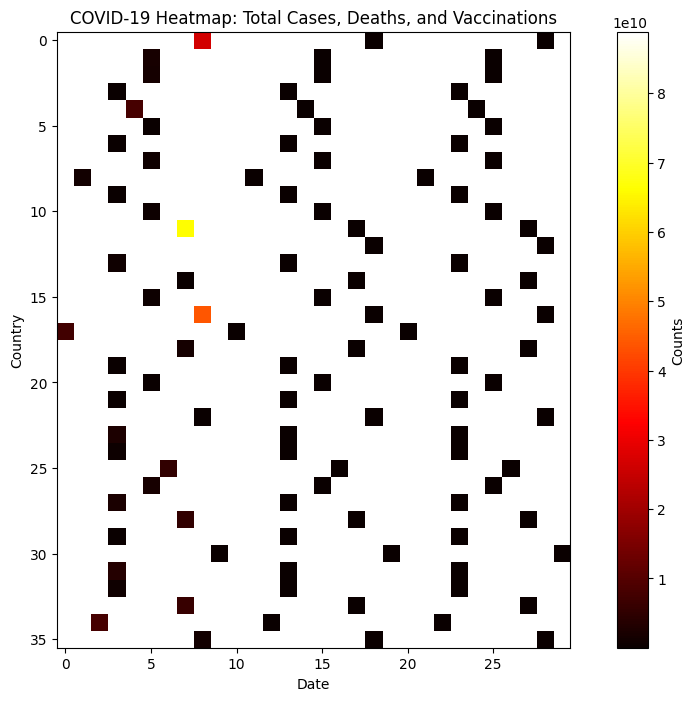

In [28]:
# Heatmap
heatmap_data = group_data.pivot(index='Country', columns='date', values=['Total Cases', 'Deaths/1M pop', 'total_vaccinations'])
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.colorbar(label='Counts')
plt.xlabel('Date')
plt.ylabel('Country')
plt.title('COVID-19 Heatmap: Total Cases, Deaths, and Vaccinations')
plt.show()

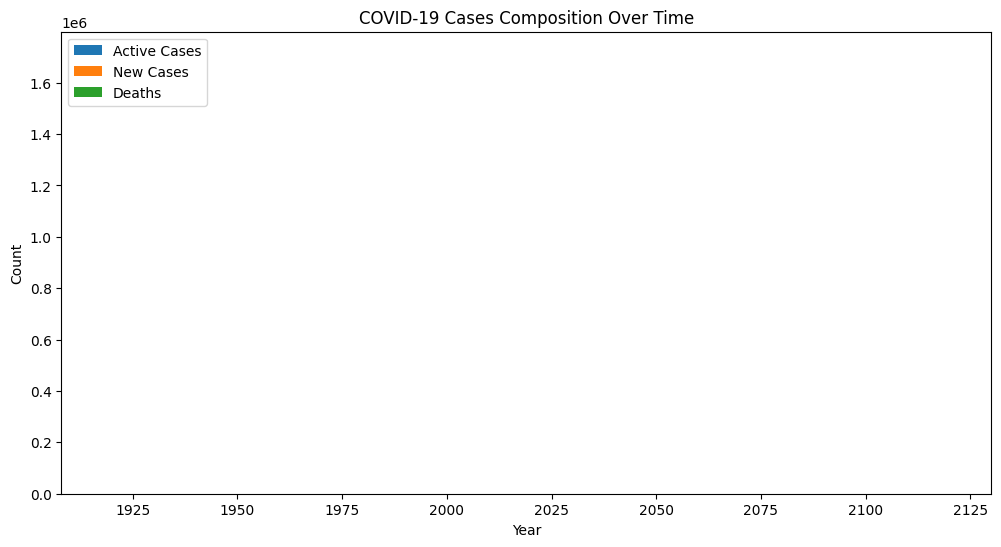

In [31]:
# Stacked Area Graph
plt.figure(figsize=(12, 6))
plt.stackplot(group_data['Year'], 
              group_data['Active Cases'], 
              group_data['New Cases'], 
              group_data['Deaths/1M pop'], 
              labels=['Active Cases', 'New Cases', 'Deaths'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('COVID-19 Cases Composition Over Time')
plt.legend(loc='upper left')
plt.show()

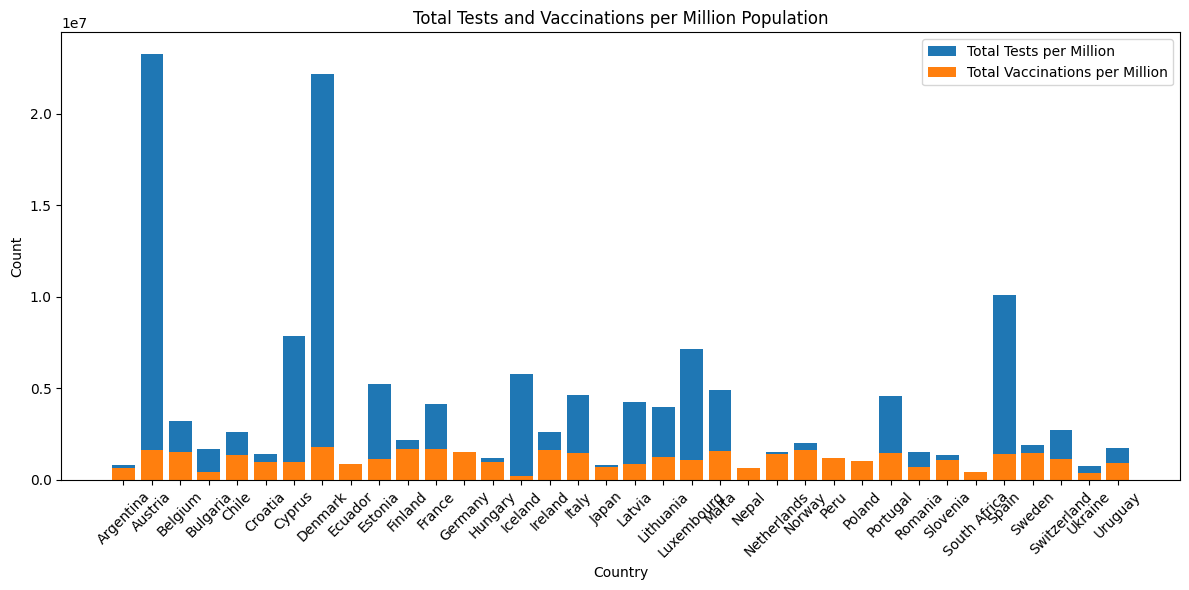

In [25]:
# Bar Graphs
plt.figure(figsize=(12, 6))

# Total tests and total vaccinations per million population across different countries
plt.bar(group_data['Country'], group_data['Tests/1M pop'], label='Total Tests per Million')
plt.bar(group_data['Country'], group_data['total_vaccinations'] / (group_data['Population'] / 1e6), label='Total Vaccinations per Million')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Total Tests and Vaccinations per Million Population')
plt.legend()
plt.tight_layout()
plt.show()

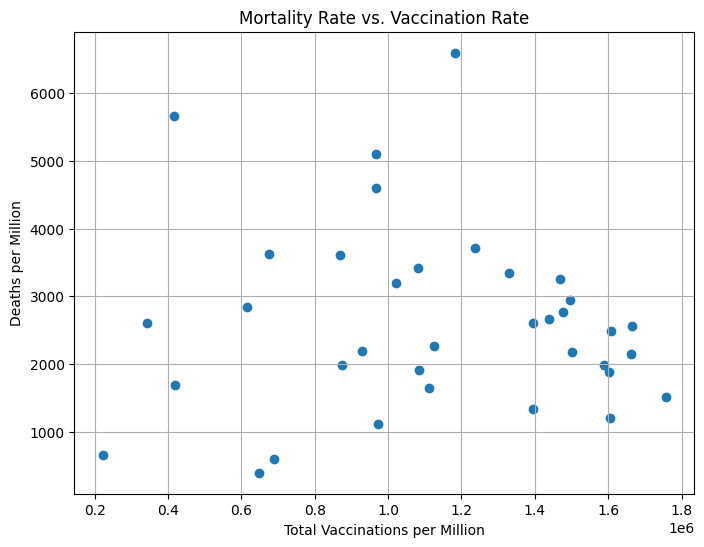

In [26]:
# Scatter Plot
plt.figure(figsize=(8, 6))

# Mortality rate vs. Vaccination rate
plt.scatter(group_data['total_vaccinations'] / (group_data['Population'] / 1e6), group_data['Deaths/1M pop'])
plt.xlabel('Total Vaccinations per Million')
plt.ylabel('Deaths per Million')
plt.title('Mortality Rate vs. Vaccination Rate')
plt.grid(True)
plt.show()

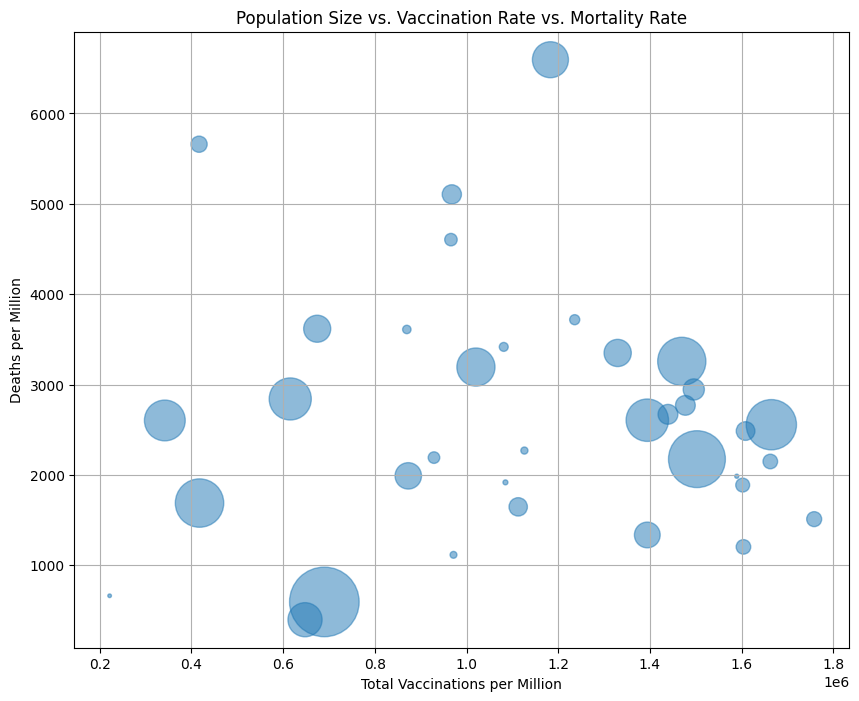

In [27]:
# Bubble Chart
plt.figure(figsize=(10, 8))

# Population size (bubble size), vaccination rate, and mortality rate for each country
bubble_size = group_data['Population'] / 1e6  # Assuming population is in millions
plt.scatter(group_data['total_vaccinations'] / bubble_size, group_data['Deaths/1M pop'], s=bubble_size * 20, alpha=0.5)
plt.xlabel('Total Vaccinations per Million')
plt.ylabel('Deaths per Million')
plt.title('Population Size vs. Vaccination Rate vs. Mortality Rate')
plt.grid(True)
plt.show()